In [13]:
import matplotlib.pyplot as plt

# Read Dataset

In [1]:
import pandas as pd
df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# Summary Stats & Nulls

In [2]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


In [3]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [4]:
(df.isna().mean() * 100).sort_values(ascending=False)

Comments         100.0
WSstdev            0.0
TModB              0.0
TModA              0.0
Precipitation      0.0
Cleaning           0.0
BP                 0.0
WDstdev            0.0
WD                 0.0
Timestamp          0.0
GHI                0.0
WS                 0.0
RH                 0.0
Tamb               0.0
ModB               0.0
ModA               0.0
DHI                0.0
DNI                0.0
WSgust             0.0
dtype: float64

# Outlier Detection

In [5]:
from scipy.stats import zscore
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z = df[cols].apply(zscore)
(z.abs() > 3).sum()

GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

# Clean Data

In [6]:
df_clean = df.copy()
df_clean[cols] = df_clean[cols].fillna(df_clean[cols].median())
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)

# Time Series Charts

<Axes: xlabel='Timestamp'>

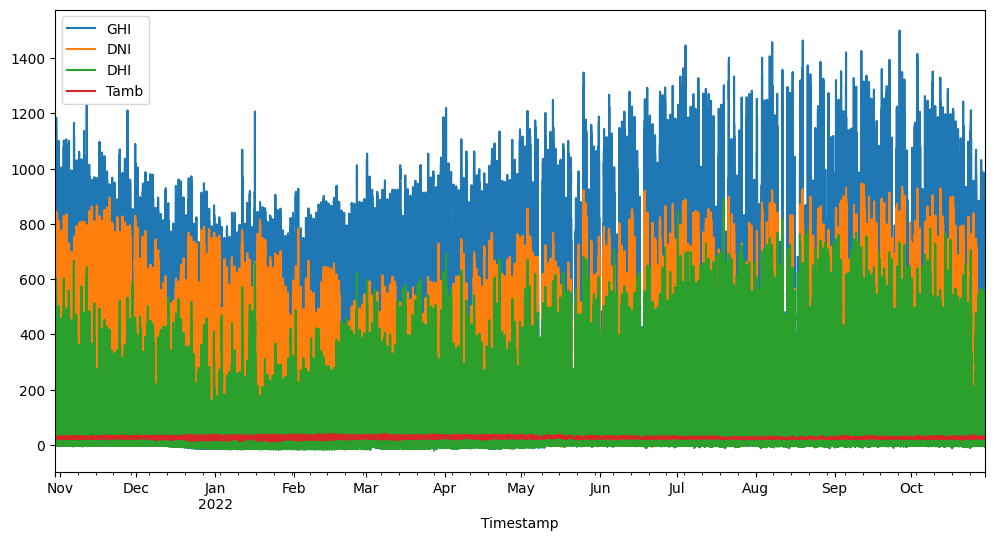

In [7]:
df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))

# Cleaning Impact

<Axes: xlabel='Cleaning'>

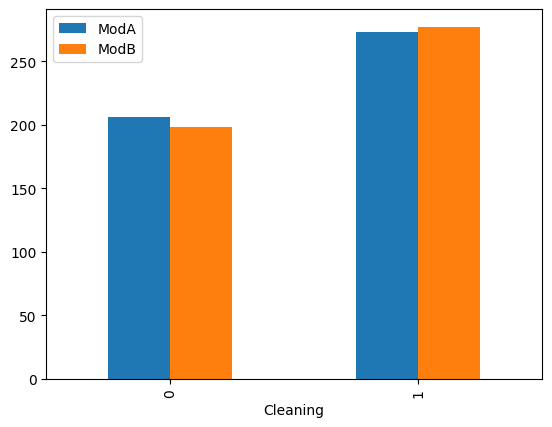

In [8]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')

# Correlation & Scatter Plots

<Axes: xlabel='WS', ylabel='GHI'>

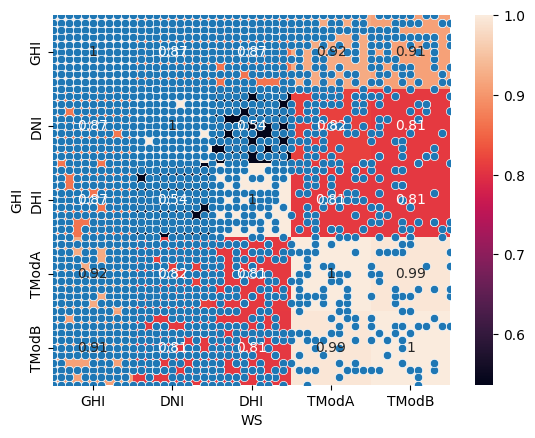

In [9]:
import seaborn as sns
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True)
sns.scatterplot(x='WS', y='GHI', data=df_clean)

# Wind + Histograms

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

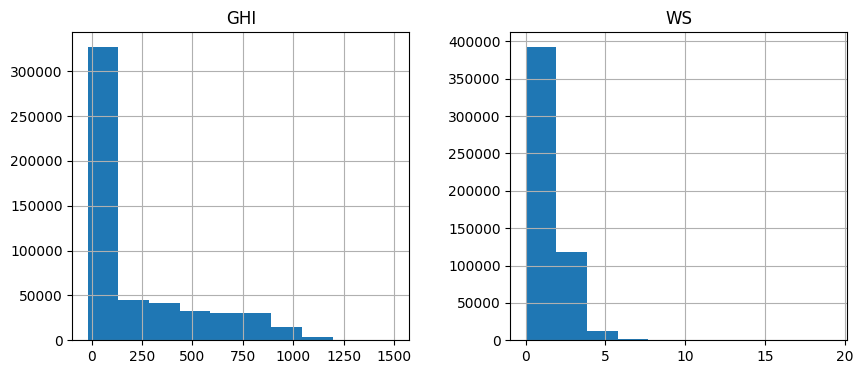

In [10]:
df_clean[['GHI', 'WS']].hist(figsize=(10,4))

# Temperature vs RH

<Axes: xlabel='RH', ylabel='Tamb'>

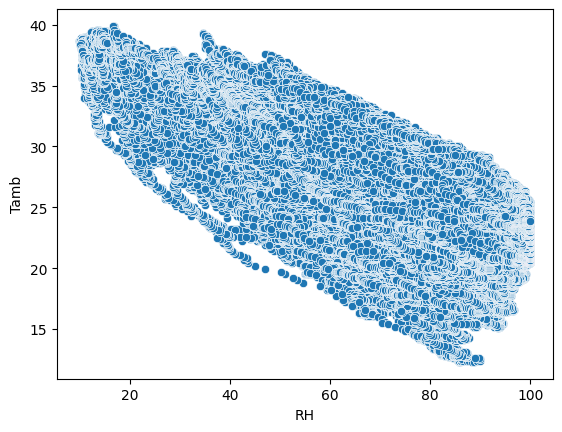

In [11]:
sns.scatterplot(x='RH', y='Tamb', data=df_clean)

# Bubble Chart

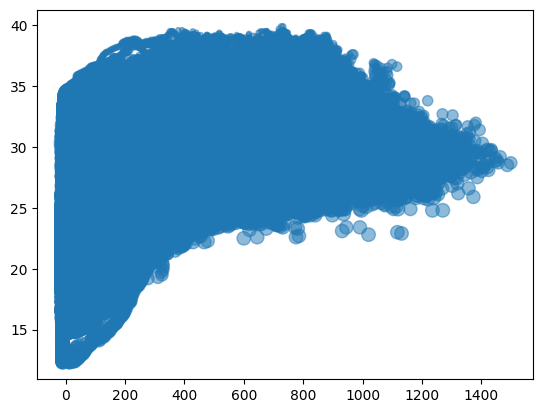

In [14]:
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)